## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[61, 74, 93],
       [39, 50, 54],
       [58, 62, 85],
       [36, 46, 73],
       [69, 88, 99],
       [16, 29, 90]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([61, 74, 93]), array([39, 50, 54]))

The lowest card in the game is

In [5]:
np.min(cards)

16

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [7]:
# To Do cell
N = 100
n = 6
k = 3
sample_size = 50000

In [8]:
min_cards = []
for i in range(sample_size):
    cards = sample_cards(N, n, k)
    min_cards.append(np.min(cards))

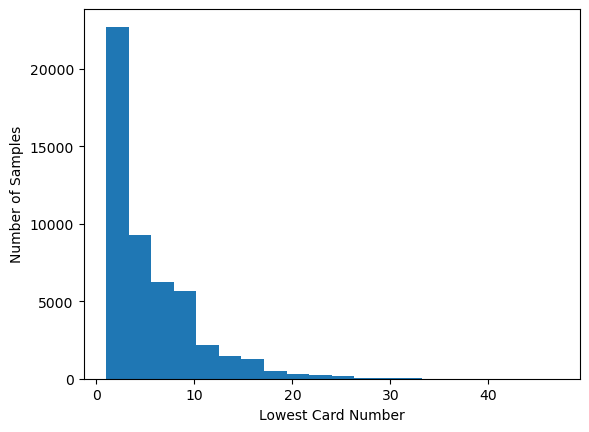

In [9]:
plt.hist(min_cards, bins=20)
plt.xlabel("Lowest Card Number")
plt.ylabel("Number of Samples")
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [10]:
# To Do cell

def make_max_diffs_sameplayer(N, n, k, sample_size):
    max_diffs = []
    for _ in range(sample_size):
        # Make card pool
        cards = sample_cards(N, n, k)
        cards_pool = cards.reshape(n*k).tolist()
        cards_pool.sort()

        # calculate the difference between consecutive numbers
        max_diff = 0
        for i in range(n*k-1):
            max_diff = max(max_diff, cards_pool[i+1] - cards_pool[i])
        max_diffs.append(max_diff)
    return max_diffs

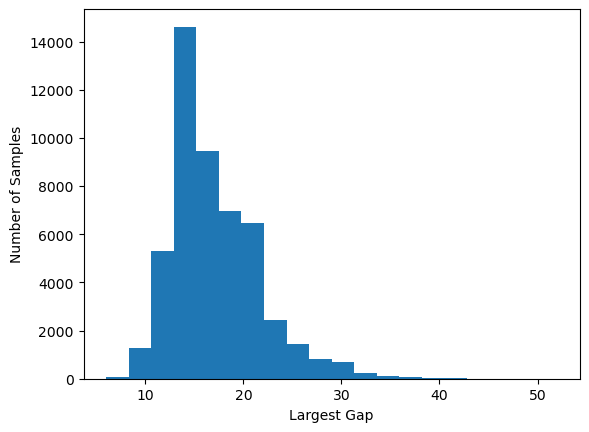

In [11]:
plt.hist(make_max_diffs_sameplayer(N, n, k, sample_size), bins=20)
plt.xlabel("Largest Gap")
plt.ylabel("Number of Samples")
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [12]:
def make_max_diffs_deffplayer(N, n, k, sample_size):
    max_diffs = []
    for _ in range(sample_size):
        cards = sample_cards(N, n, k)
        cards_deck = []
        for i in range(n):
            for j in range(k):
                cards_deck.append((cards[i][j], i))

        cards_deck = sorted(cards_deck)
        max_diff = 0
        for i in range(n*k-1):
            if cards_deck[i][1] != cards_deck[i+1][1]:
                max_diff = max(max_diff, cards_deck[i+1][0] - cards_deck[i][0])
        max_diffs.append(max_diff)
    return max_diffs

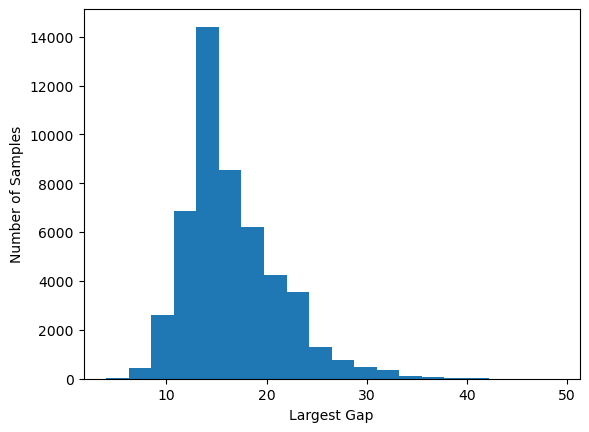

In [13]:
plt.hist(make_max_diffs_deffplayer(N, n, k, sample_size), bins=20)
plt.xlabel("Largest Gap")
plt.ylabel("Number of Samples")
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 
Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

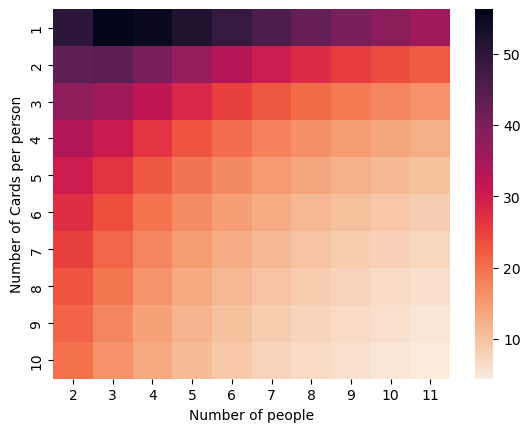

In [14]:
# To Do cell
# ①the gap between any players including the same one
N = 150
sample_size = 10000

diff_matrix = [[None for i in range(10)] for j in range(10)]
for i in range(1, 11): #  number of cards per player: 1-10
    for j in range(2, 12): # number of plyaers: 2-11
        n = j
        k = i
        diff_matrix[i-1][j-2] = np.mean(make_max_diffs_deffplayer(N, n, k, sample_size)) # compute the mean of all gaps in the sampling
df = pd.DataFrame(data=diff_matrix, index=range(1, 11), columns=range(2, 12))
ax = sns.heatmap(df, cmap=sns.cm.rocket_r)
ax.set(xlabel="Number of people", ylabel="Number of Cards per person")
plt.show()

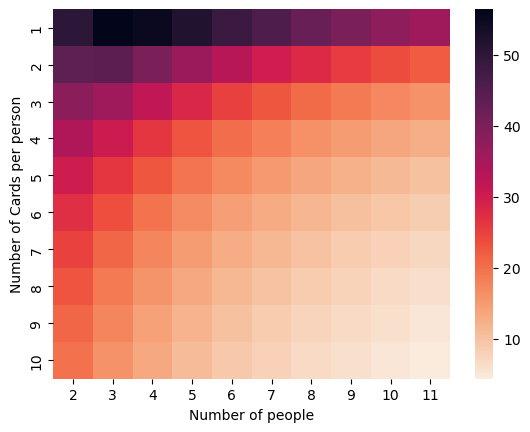

In [15]:
# ②the gap between different players
N = 150
sample_size = 10000

diff_matrix = [[None for i in range(10)] for j in range(10)]
for i in range(1, 11): #  number of cards per player: 1-10
    for j in range(2, 12): # number of plyaers: 2-11
        n = j
        k = i
        diff_matrix[i-1][j-2] = np.mean(make_max_diffs_deffplayer(N, n, k, sample_size)) # compute the mean of all gaps in the sampling
df = pd.DataFrame(data=diff_matrix, index=range(1, 11), columns=range(2, 12))
ax = sns.heatmap(df, cmap=sns.cm.rocket_r)
ax.set(xlabel="Number of people", ylabel="Number of Cards per person")
plt.show()

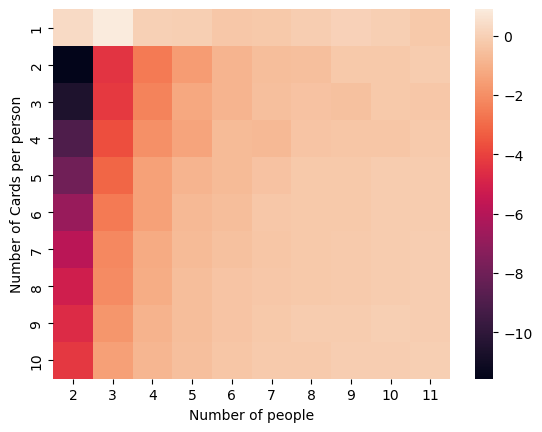

In [16]:
# ③the difference between ① and ②
N = 150
sample_size = 10000

diff_matrix = [[None for i in range(10)] for j in range(10)]
for i in range(1, 11): #  number of cards per player: 1-10
    for j in range(2, 12): # number of plyaers: 2-11
        n = j
        k = i
        diff_matrix[i-1][j-2] = np.mean(make_max_diffs_deffplayer(N, n, k, sample_size)) - np.mean(make_max_diffs_sameplayer(N, n, k, sample_size))
df = pd.DataFrame(data=diff_matrix, index=range(1, 11), columns=range(2, 12))
ax = sns.heatmap(df)
ax.set(xlabel="Number of people", ylabel="Number of Cards per person")
plt.show()

<span style="font-size: 150%;"></span>

<span style="font-size: 120%;">　From the experiments ① and ②, we see that the small number of players and cards per players causes the larger magnitude of mean of gaps. In addition, we can apply this property to the difference of gaps between ① and ②(③).</span>

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [17]:
# To Do cell
# sampling with numpy
n = 100
p = 0.5
n_trials = 100000
empirical_data = np.random.binomial(n, p, n_trials)

In [18]:
# binominal distribution
n = 100
x = range(n)
f = stats.binom(n, p)
y = f.pmf(x) * n_trials

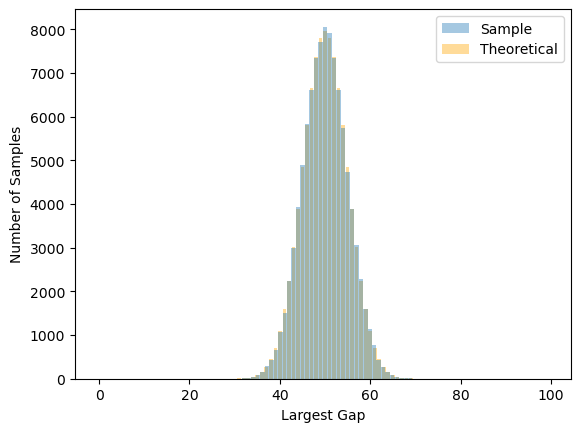

In [19]:
plt.bar(x, y, alpha=0.4, label="Theoretical", color="orange")
plt.hist(empirical_data, bins=100, range=(0, n-1), alpha=0.4, label="Sample")
plt.legend(loc="upper right")
plt.xlabel("Largest Gap")
plt.ylabel("Number of Samples")
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

In [20]:
x = np.linspace(0, 0.5, 100)

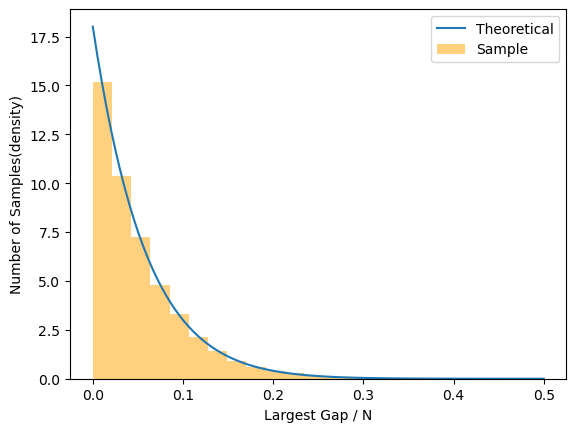

In [31]:
sample_data = [a/N for a in min_cards]
plt.plot(x, stats.beta.pdf(x, 1, n*k+1-1), label="Theoretical") # beta distribution pdf
plt.hist(sample_data, bins=20, color="orange", alpha=0.5, density=True, label="Sample") # transform the bar height into density
plt.legend(loc="upper right")
plt.xlabel("Largest Gap / N")
plt.ylabel("Number of Samples(density)")
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

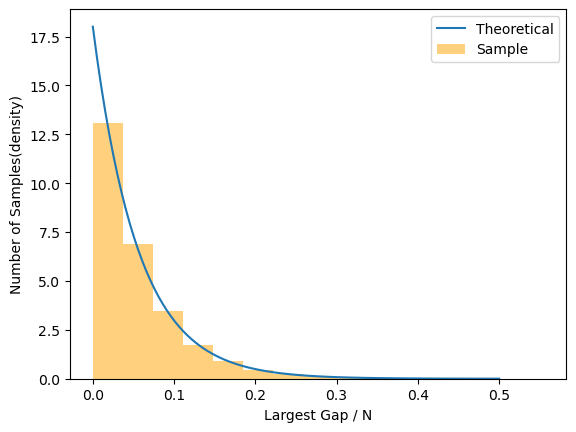

In [32]:
X = [-math.log(1-a/N) for a in min_cards]
plt.plot(x, stats.expon.pdf(x, scale=1/(n*k)), label="Theoretical") # exponential distribution pdf
plt.hist(X, bins=15, color="orange", alpha=0.5, density=True, label="Sample") # transform the bar height into density
plt.legend(loc="upper right")
plt.xlabel("Largest Gap / N")
plt.ylabel("Number of Samples(density)")
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [23]:
# To Do cell
# make a function for sampling cards with reposition
def sample_cards_reposition(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players with reposition. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

# N = 30, without reposition

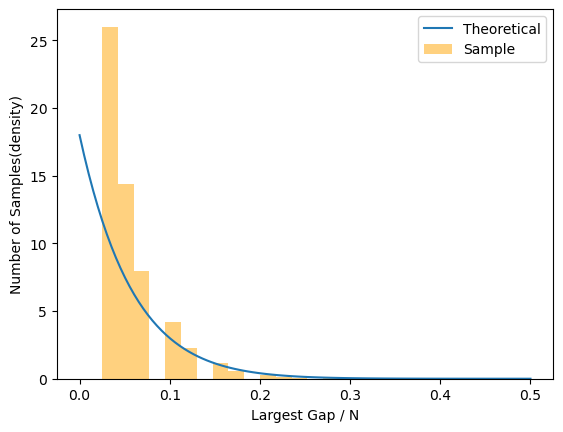

In [24]:
N = 40
n = 6
k = 3
sample_size = 50000
min_cards = []
for i in range(sample_size):
    cards = sample_cards(N, n, k)
    min_cards.append(np.min(cards))

sample_data = [a/N for a in min_cards]
plt.plot(x, stats.beta.pdf(x, 1, n*k+1-1), label="Theoretical") # beta distribution pdf
plt.hist(sample_data, bins=20, color="orange", alpha=0.5, density=True, label="Sample") # transform the bar height into density
plt.legend(loc="upper right")
plt.xlabel("Largest Gap / N")
plt.ylabel("Number of Samples(density)")
plt.show()

# N = 30, with reposition

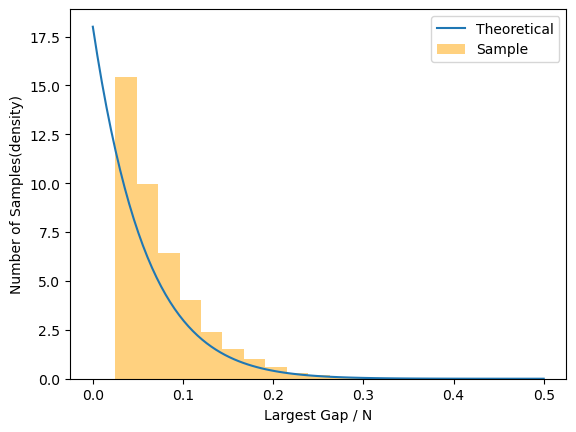

In [25]:
N = 40
n = 6
k = 3
sample_size = 50000
min_cards = []
for i in range(sample_size):
    cards = sample_cards_reposition(N, n, k)
    min_cards.append(np.min(cards))

sample_data = [a/N for a in min_cards]
plt.plot(x, stats.beta.pdf(x, 1, n*k+1-1), label="Theoretical") # beta distribution pdf
plt.hist(sample_data, bins=20, color="orange", alpha=0.5, density=True, label="Sample") # transform the bar height into density
plt.legend(loc="upper right")
plt.xlabel("Largest Gap / N")
plt.ylabel("Number of Samples(density)")
plt.show()

# N = 10,000 without reposition

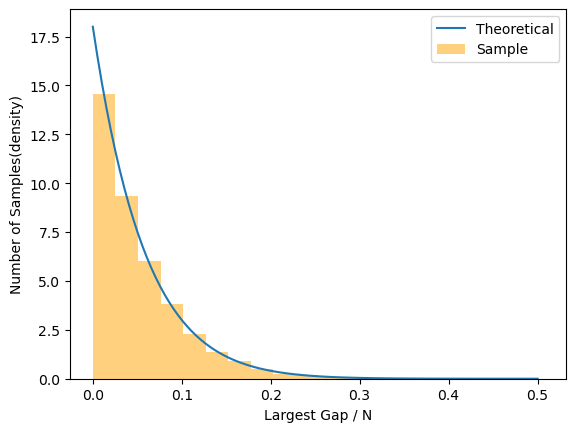

In [26]:
N = 10000
n = 6
k = 3
sample_size = 50000
min_cards = []
for i in range(sample_size):
    cards = sample_cards(N, n, k)
    min_cards.append(np.min(cards))

sample_data = [a/N for a in min_cards]
plt.plot(x, stats.beta.pdf(x, 1, n*k+1-1), label="Theoretical") # beta distribution pdf
plt.hist(sample_data, bins=20, color="orange", alpha=0.5, density=True, label="Sample") # transform the bar height into density
plt.legend(loc="upper right")
plt.xlabel("Largest Gap / N")
plt.ylabel("Number of Samples(density)")
plt.show()

# N = 10,000 with reposition

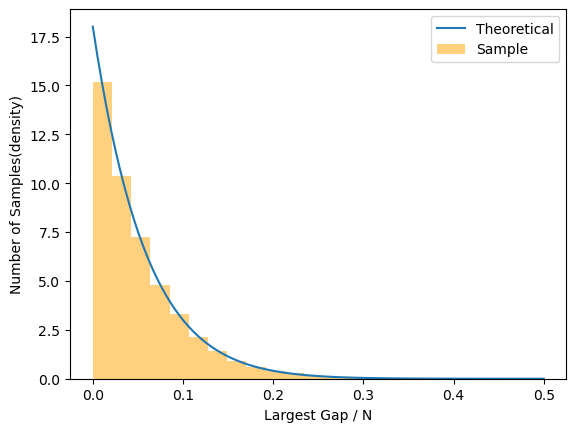

In [27]:
N = 10000
n = 6
k = 3
sample_size = 50000
min_cards = []
for i in range(sample_size):
    cards = sample_cards_reposition(N, n, k)
    min_cards.append(np.min(cards))

sample_data = [a/N for a in min_cards]
plt.plot(x, stats.beta.pdf(x, 1, n*k+1-1), label="Theoretical") # beta distribution pdf
plt.hist(sample_data, bins=20, color="orange", alpha=0.5, density=True, label="Sample") # transform the bar height into density
plt.legend(loc="upper right")
plt.xlabel("Largest Gap / N")
plt.ylabel("Number of Samples(density)")
plt.show()

<span style="font-size: 120%;">　In the case that n\*k and N are on the same order of magnitude, we see that the sample cards without repositioning have certainly a biased distribution, on the other hand, the cards with repositioning show a distribution that matches the theoretical one. When the N is much larger than n\*k, the effect of repositioning decreases because the share of n\*k is so low. As a result, the cards selected both with and without repositioning illustrate similar distributions which fit accurate distributions.</span>

---

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Yoshiyasu Kawamura
- Member No2: 
- Member No3: